# Cross Validation

In this notebook, I validate choices using cross validation.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib

import pymc3 as pm
import theano.tensor as tt
import exoplanet as xo

import aviary as av
import astropy.modeling as apm

from tqdm import trange
import pickle

from cv_routines import *

plotpar = {'axes.labelsize': 30,
           'font.size': 30,
           'legend.fontsize': 15,
           'xtick.labelsize': 30,
           'ytick.labelsize': 30,
           'text.usetex': True}
plt.rcParams.update(plotpar)

In [3]:
def RMS(ypred, yobs):
    return np.sqrt(sum((ypred - yobs)**2) / float(len(ypred)))

def MAD(ypred, yobs):
    return np.median(abs(ypred - yobs))

Variables to be optimized:

In [4]:
filename = "../data/CV_gp_model.pkl"

In [7]:
young_limit = .7  # .1 is worse.
old_limit = 20.
hot_limit = 1.
dp, dc = .05, .05
cluster_old_err = .05  # The relative prot uncertainty on Ruprecht 147 and NGC6819
kinerr = .05 # The relative prot uncertainty on kinematic grid periods. .1 was worse. .03 also worse, but better MAD (bad at old ages).
abs_kinerr = 2.
sun_err = .01  # The absolute prot uncertainty on the Sun's rotation period.

In [8]:
x, age, prot, prot_err, ID, akin, cluster_x, cluster_prot, cluster_age = assemble_data(young_limit, old_limit, hot_limit, dp, dc, cluster_old_err, abs_kinerr, sun_err)

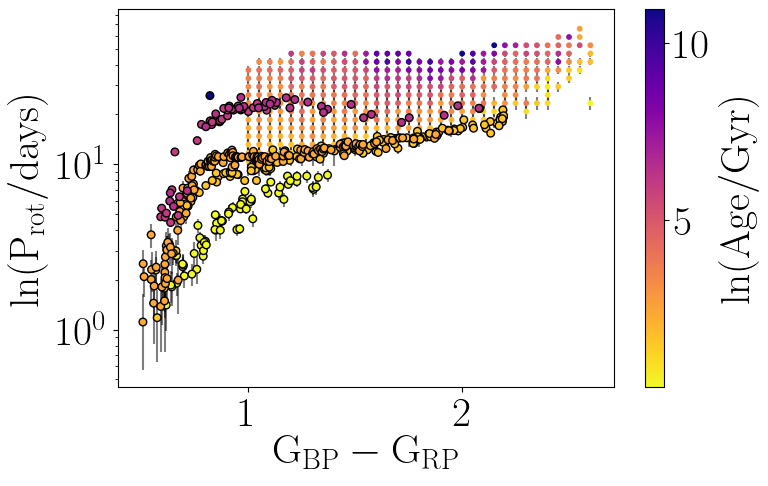

In [9]:
plt.figure(figsize=(8, 5), dpi=100)
plt.errorbar(x, prot, yerr=prot_err, fmt=".", color="k", alpha=.5, ms=1, zorder=0)
plt.scatter(x[ID==0], prot[ID==0], c=age[ID==0], s=30, edgecolor="k", cmap="plasma_r", zorder=2)
plt.scatter(x[ID==1], prot[ID==1], c=age[ID==1], s=10, cmap="plasma_r", zorder=1)
plt.xlabel("$$\mathrm{G_{BP}-G_{RP}}$$")
plt.ylabel("$\mathrm{ln(P_{rot}/days)}$")
plt.colorbar(label="$\mathrm{ln(Age/Gyr)}$")
plt.yscale("log")

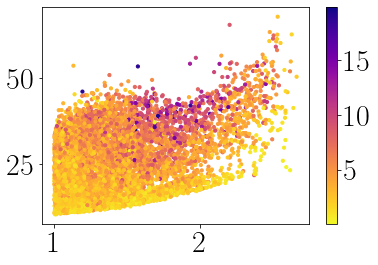

In [55]:
plt.scatter(akin.bprp_dered, akin.Prot, c=akin.kin_age_lucy, s=10, cmap="plasma_r")
plt.colorbar();

First, let's see what the age residuals look like when you don't leave any stars out. Fit the model to all the data.

In [36]:
young_limit = .7  # .1 is worse.
old_limit = 20.
hot_limit = 1.
dp, dc = .05, .05
cluster_old_err = .05  # The relative prot uncertainty on Ruprecht 147 and NGC6819
# kinerrs = np.linspace(.01, .1, 1)  # The relative prot uncertainty on kinematic grid periods. .1 was worse. .03 also worse, but better MAD (bad at old ages).
abs_kinerrs = np.linspace(.5, 1.5, 5)  # The absolute prot uncertainty """"""
sun_err = .01  # The absolute prot uncertainty on the Sun's rotation period.
abs_kinerrs = 1. 

array([0.5 , 0.75, 1.  , 1.25, 1.5 ])

Model variables: slope_low, slope_high, log_smooth, teff_break, log_period_break_m, log_period_break_b, log_s2, log_amp, log_ell

In [37]:
rms, mad = [np.zeros(len(abs_kinerrs)) for i in range(2)]
results, mus = [], []
for j, kinerr in enumerate(abs_kinerrs):
    print(j+1, "of", len(kinerrs), "kinerr = ", kinerr)
    x, age, prot, prot_err, ID, akin, cluster_x, cluster_prot, cluster_age = assemble_data(young_limit, old_limit, hot_limit, dp, dc, cluster_old_err, kinerr, sun_err)
    
    # Retrain the model
    map_soln = av.fit_gp(x, age, prot, prot_err, filename)
    
    mu, sig, mu_fit = get_stellar_ages(x, prot, prot_err, filename)
    rms[j] = RMS(age, mu)
    mad[j] = MAD(age, mu)
    results.append(map_soln)
    mus.append(mu)

1 of 1 kinerr =  0.5


/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1127.7031655628946 -> -1123.6422054315922
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1123.6422054315922 -> -1122.9857677527261
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1122.9857677527261 -> -1120.9782818503202
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1120.9782818503202 -> -1119.1268085219137
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1119.1268085219137 -> 230.46239845739703
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 230.46239845739703 -> 239.7160012327322
100%|██████████| 752/752 [01:07<00:00, 11.18it/s]


2 of 1 kinerr =  0.75


optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1128.3004058632107 -> -1124.2400824109584
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1124.2400824109584 -> -1123.5831809853346
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1123.5831809853346 -> -1121.5768722590558
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1121.5768722590558 -> -1119.7257468515747
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1119.7257468515747 -> 231.03679897367834
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 231.03679897367834 -> 241.76083863566066
100%|██████████| 752/752 [01:04<00:00, 11.69it/s]


3 of 1 kinerr =  1.0


optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1128.8950686037124 -> -1124.8353827459603
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1124.8353827459603 -> -1124.1780190057532
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1124.1780190057532 -> -1122.17288165384
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1122.17288165384 -> -1120.3221015812724
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1120.3221015812724 -> 223.4277278148161
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 223.4277278148161 -> 235.44961361950328
100%|██████████| 752/752 [01:03<00:00, 11.76it/s]


4 of 1 kinerr =  1.25


optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1129.4871793283492 -> -1125.4281319572633
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1125.4281319572633 -> -1124.770307325895
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1124.770307325895 -> -1122.7663356080095
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1122.7663356080095 -> -1120.9158983122945
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1120.9158983122945 -> 212.3405584124407
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 212.3405584124407 -> 225.05753654292837
100%|██████████| 752/752 [01:02<00:00, 12.01it/s]


5 of 1 kinerr =  1.5


optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1130.0767631601577 -> -1126.0183551451566
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1126.0183551451566 -> -1125.360071037473
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1125.360071037473 -> -1123.3572592736004
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1123.3572592736004 -> -1121.5071622242797
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1121.5071622242797 -> 200.16174847057113
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 200.16174847057113 -> 213.2439084344833
100%|██████████| 752/752 [01:01<00:00, 12.28it/s]


In [38]:
rms  # [0.81800025]

array([1.59782176, 0.87388228, 0.83805357, 0.8272658 , 0.82018521])

In [39]:
log_s2 = np.array([float(results[k]["log_s2"]) for k in range(len(results))])
log_s2

array([-5.29678801, -5.84857058, -6.14046763, -6.26912797, -6.32397656])

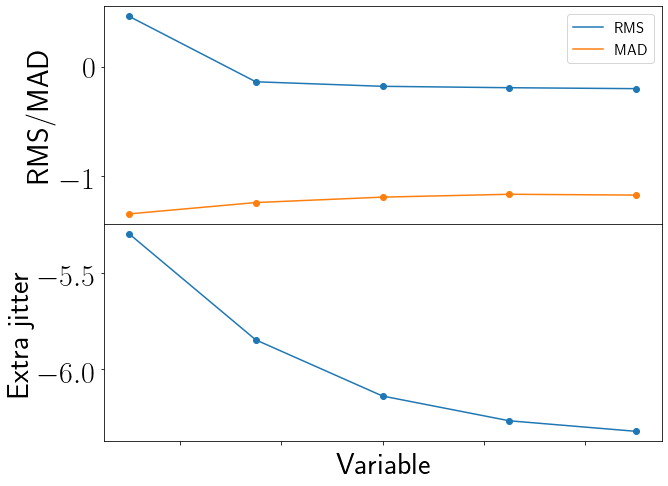

In [40]:
fig = plt.figure(figsize=(10, 8))
ax0 = fig.add_subplot(211)
ax0.plot(abs_kinerrs, np.log(rms), "C0o")
ax0.plot(abs_kinerrs, np.log(rms), "C0-", label="RMS")
ax0.plot(abs_kinerrs, np.log(mad), "C1o")
ax0.plot(abs_kinerrs, np.log(mad), "C1-", label="MAD")
ax0.set_ylabel("RMS/MAD")
ax0.legend()

ax1 = fig.add_subplot(212, sharex=ax0)
ax1.plot(abs_kinerrs, log_s2, "C0o")
ax1.plot(abs_kinerrs, log_s2, "C0-")
ax1.set_xticklabels([])
ax1.set_xlabel("Variable")
ax1.set_ylabel("Extra jitter")
plt.subplots_adjust(hspace=0.)

In [41]:
np.min(age)

0.12

In [51]:
x2_min = .12

def log_period_model(x2, log_period_break_m, log_period_break_b):
    """
    2nd-order polynomial describing relationship between period and
    age. period = m*logage + b
    """
    return log_period_break_m * (x2 - x2_min) + log_period_break_b

# Mean model
def gyro_mean_model(x1, x2, log_period_break_m, log_period_break_b,
                    teff_break, slope_low, slope_high, smooth):
    """
    Predict the period at given values of color and age.
    Use a smoothed broken power law for the period - color relation.
    Use get_log_period_break for the period - age relation.
    """
    delta = x1 - teff_break
    brk = log_period_model(x2, log_period_break_m, log_period_break_b)  # Get the period at this age
    slope = slope_low / (1 + np.exp(smooth * delta)) \
        + slope_high / (1 + np.exp(-smooth * delta))
    return slope * delta + brk

1.0
2.4444444444444446
3.8888888888888893
5.333333333333334
6.777777777777778
8.222222222222221
9.666666666666664
11.111111111111109
12.555555555555557
13.999999999999996


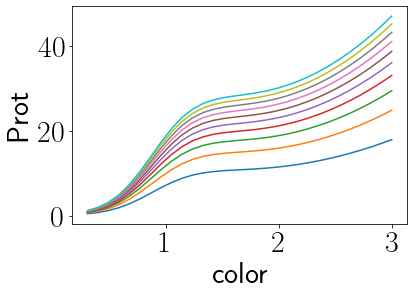

In [52]:
map_soln = results[0]
age_plot = np.log(np.linspace(1, 14, 10))
x_plot = np.linspace(.3, 3., 30)

lp = []
for a in age_plot:
    print(np.exp(a))
    log_p = gyro_mean_model(x_plot, a, map_soln["log_period_break_m"], map_soln["log_period_break_b"],
                            map_soln["teff_break"], map_soln["slope_low"], map_soln["slope_high"],
                            map_soln["log_smooth"])
    plt.plot(x_plot, np.exp(log_p))
#     log_p = log_period_model(a, map_soln["log_period_break_m"], map_soln["log_period_break_b"])
#     lp.append(log_p)
# plt.plot(np.exp(age_plot), np.exp(lp))
plt.xlabel("color")
plt.ylabel("Prot");

retrain

In [47]:
# x, age, prot, prot_err, ID, akin, cluster_x, cluster_prot, cluster_age = assemble_data(young_limit, old_limit, hot_limit, dp, dc, cluster_old_err, 1.625, sun_err)
    
# # Retrain the model
# map_soln = av.fit_gp(x, age, prot, prot_err, filename)
    
# mu, sig, mu_fit = get_stellar_ages(x, prot, prot_err, filename)
i = 1

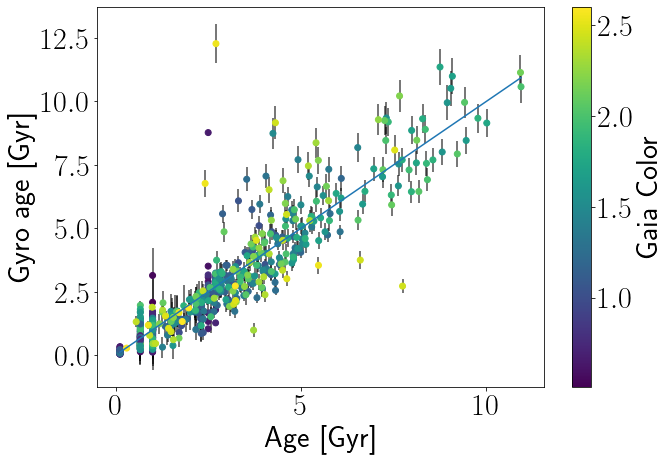

In [48]:
fig = plt.figure(figsize=(10, 7))
# plt.errorbar(age, mu-age, yerr=sig, fmt=".")
# plt.axhline(0, color="k", lw=.5)
plt.errorbar(age, mus[i], yerr=sig, fmt="k.", alpha=.7, zorder=0)
plt.scatter(age, mus[i], c=x)
xs = np.linspace(min(age), max(age), 100)
plt.plot(xs, xs)
plt.colorbar(label="Gaia Color")
plt.xlabel("Age [Gyr]")
plt.ylabel("Gyro age [Gyr]");

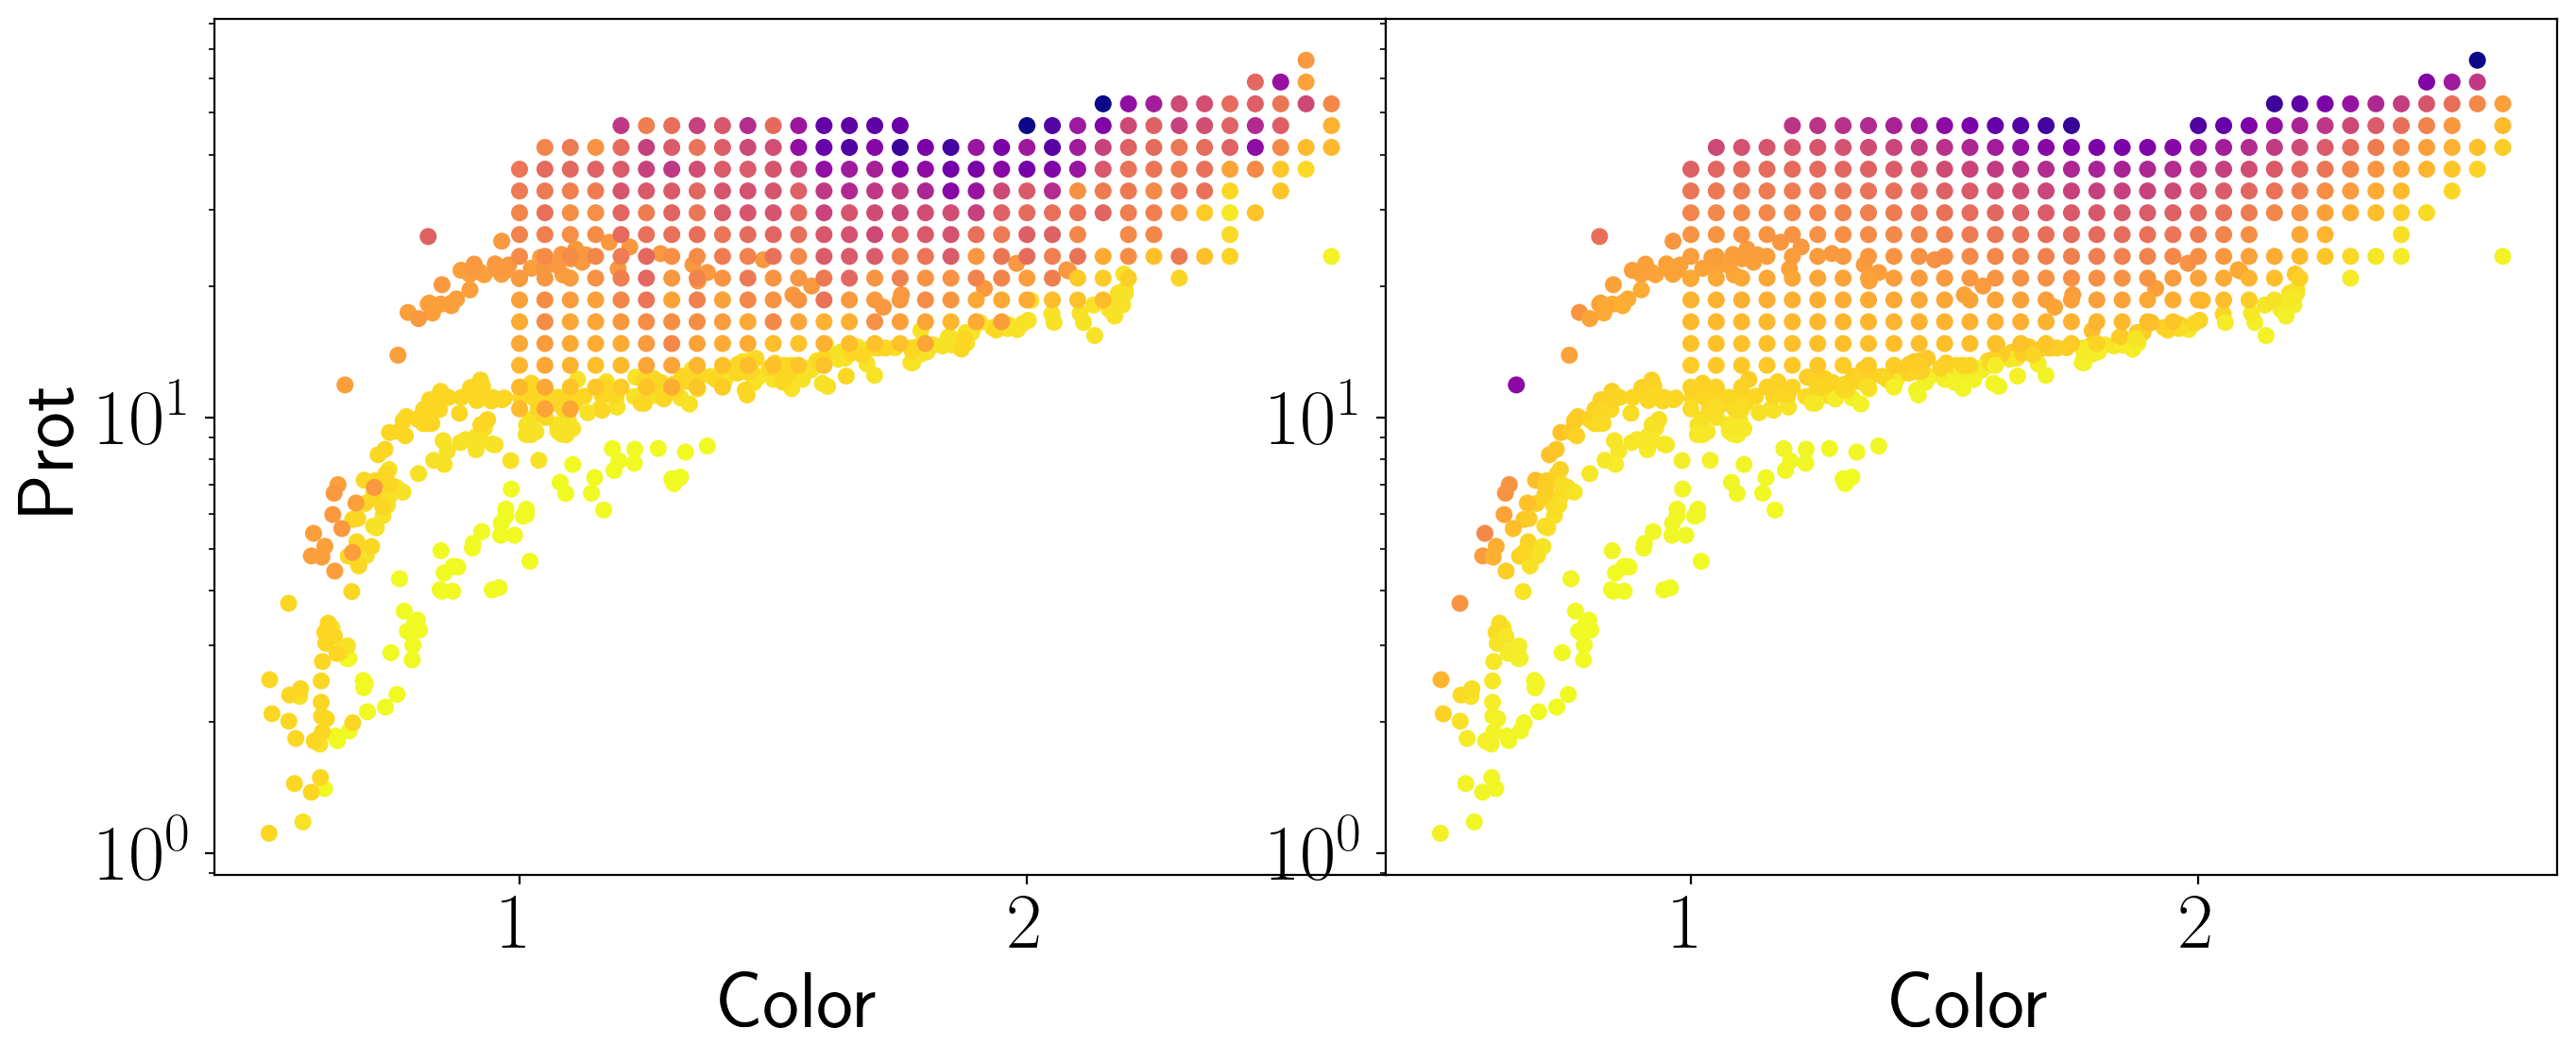

In [49]:
fig = plt.figure(figsize=(16, 6), dpi=200)
ax0 = fig.add_subplot(121)
ax0.scatter(x, prot, c=age, s=30, cmap="plasma_r")
ax0.set_yscale("log")
ax0.set_xlabel("Color")
ax0.set_ylabel("Prot")

ax1 = fig.add_subplot(122, sharey=ax0)
ax1.scatter(x, prot, c=mus[i], s=30, cmap="plasma_r")
# ax1.set_yticklabels([])
# ax1.set_yscale("log")
ax1.set_xlabel("Color")

plt.subplots_adjust(wspace=0.)

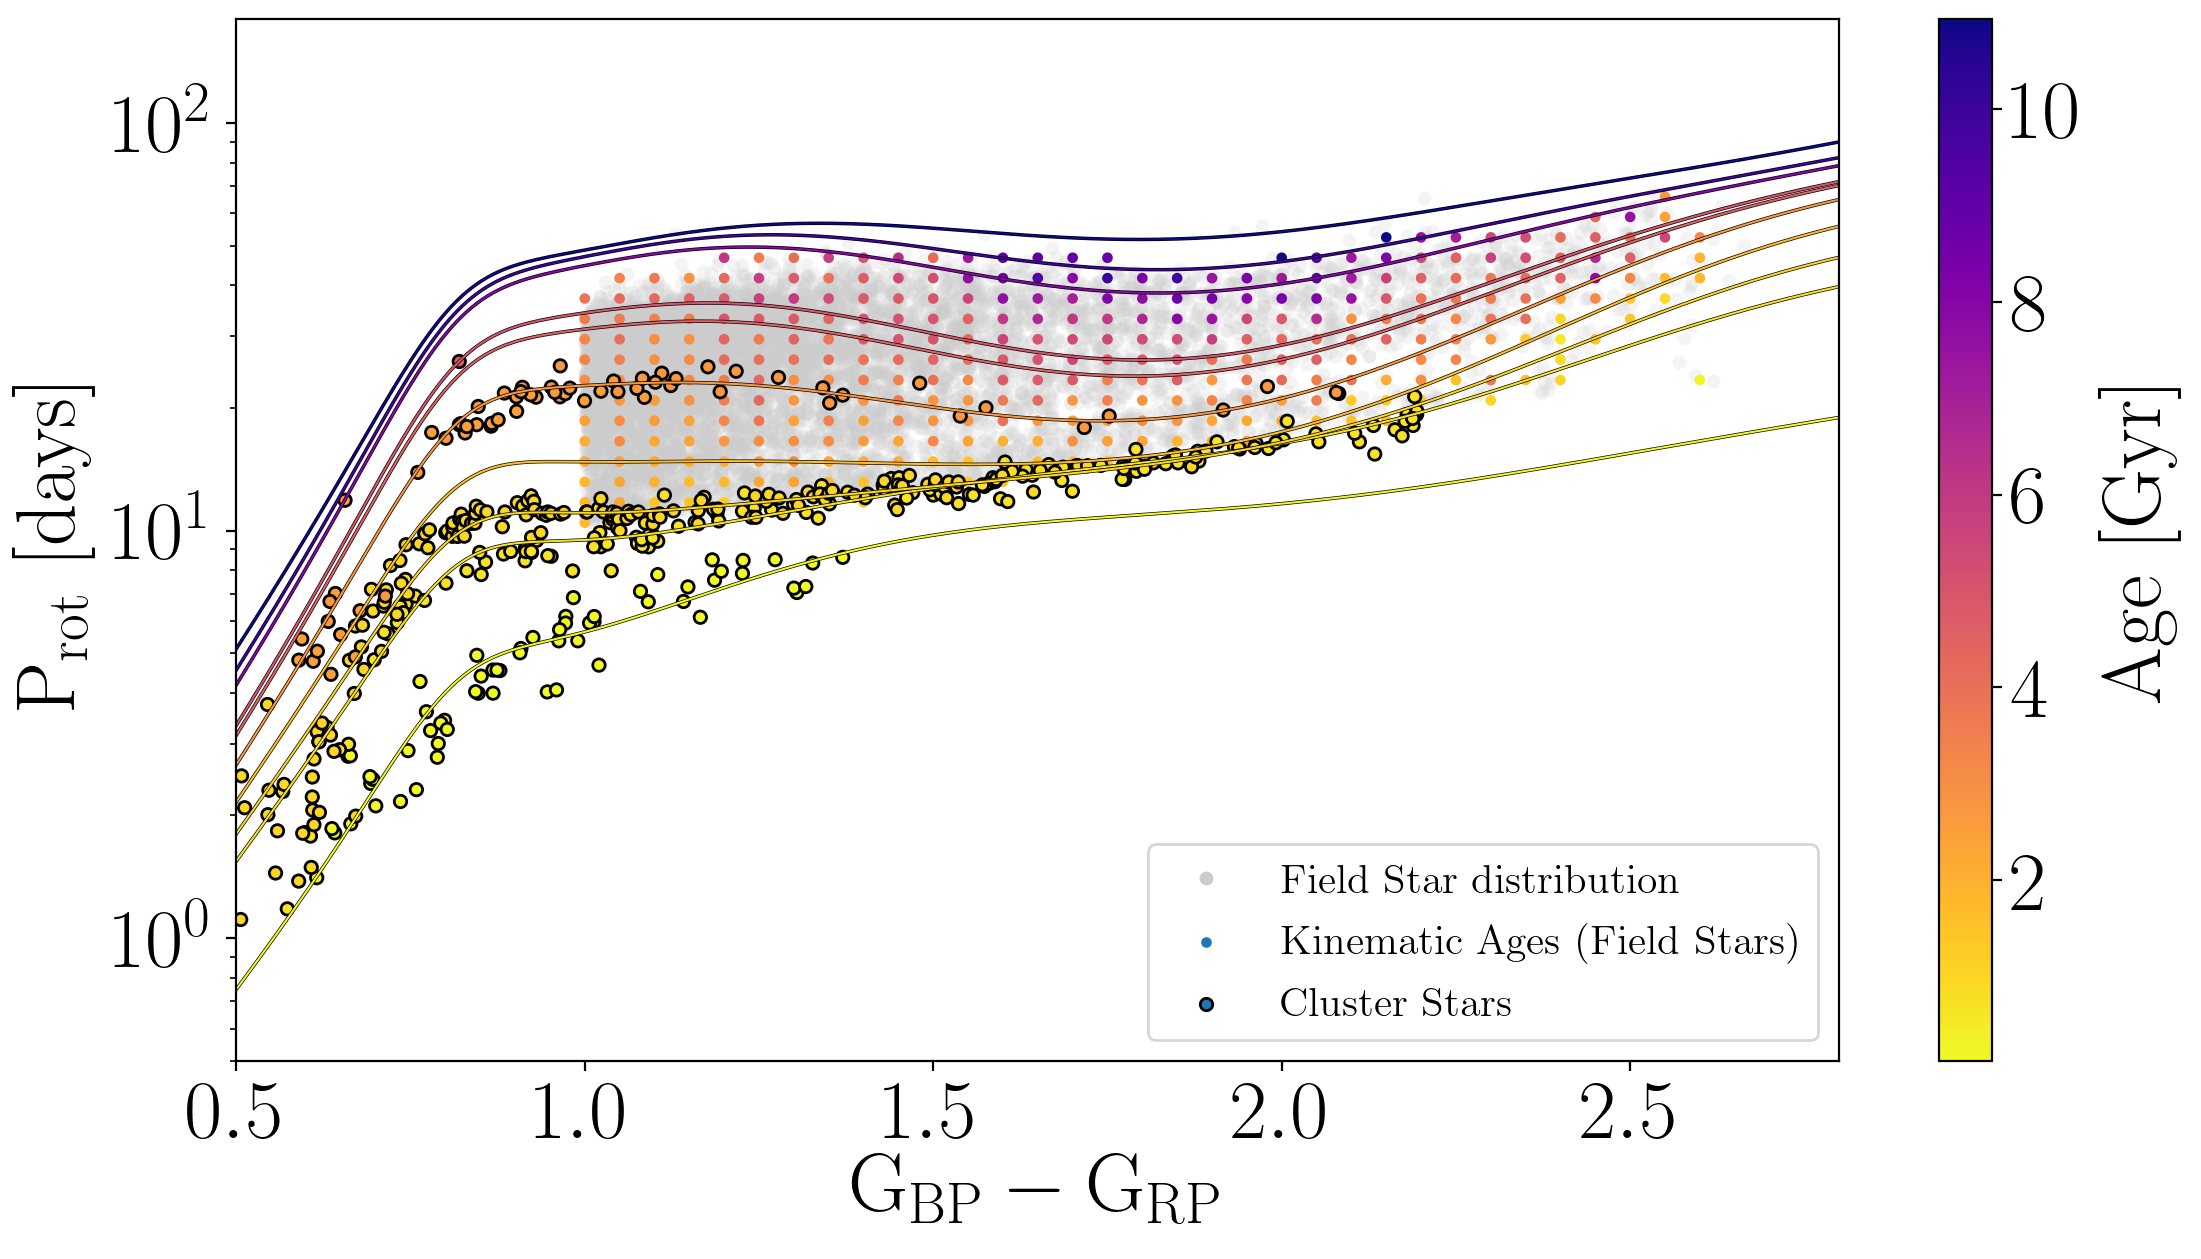

In [53]:
make_plot(akin, x, age, prot, prot_err, cluster_x, cluster_prot, cluster_age, filename)

# Now using proper cross validation.

Pull out some data for cross validation and loop over cross validation batches.

In [103]:
def train_val(x, y, z, yerr, ID, ind_batch):
    
    # Divide data into train and validate
    bools = np.ones(len(x), dtype="bool")
    bools[ind_batch] = np.zeros(len(bools[ind_batch]), dtype="bool")*1
    xval, yval, yerrval, zval, IDval = x[ind_batch], y[ind_batch], \
        yerr[ind_batch], z[ind_batch], ID[ind_batch]
    xtrain, ytrain, yerrtrain, ztrain, IDtrain = x[bools], y[bools], yerr[bools], z[bools], ID[bools]
    return xtrain, xval, ytrain, yval, ztrain, zval, yerrtrain, yerrval, IDtrain, IDval

def cross_validate(x, age, prot, prot_err, ID, filename, nbatches=10, nstars=10, seed=42):
    
    # Randomly select indices for nbatches of data for training and validation.
    np.random.seed(seed)
    ind_batches = [np.random.choice(np.arange(len(x)), nstars) for i in range(nbatches)]
    
    true_ages, pred_ages, sigmas, ids, results = [], [], [], [], []
    for i in range(nbatches):  # For each cross validation test
    
        # Split data into train and validate.
        x_train, x_val, prot_train, prot_val, age_train, age_val, prot_err_train, \
            prot_err_val, ID_train, ID_val = train_val(x, prot, age, prot_err, ID, ind_batches[i])

        # Fit the GP gyro model to training set and get ages for validation set
        map_soln = av.fit_gp(x_train, age_train, prot_train, prot_err_train, filename)
        mu, sig, mu_fit = get_stellar_ages(x_val, prot_val, prot_err_val, filename)

        # Save the results
        true_ages.append(age_val)
        pred_ages.append(mu)
        sigmas.append(sig)
        ids.append(ID_val)
        results.append(map_soln)
        
    # Combine results from all batches.
    trues = np.array([i for j in true_ages for i in j])
    preds = np.array([i for j in pred_ages for i in j])
    sigs = np.array([i for j in sigmas for i in j])
    idss = np.array([i for j in ids for i in j])
    return trues, preds, sigs, idss, results

Variables to test.

In [101]:
young_limit = .7  # .1 is worse.
old_limit = 20.
hot_limit = 1.
dp, dc = .05, .05
cluster_old_err = .05  # The relative prot uncertainty on Ruprecht 147 and NGC6819
abs_kinerrs = np.linspace(.5, 1.5, 2)  # The absolute prot uncertainty """"""
sun_err = .01  # The absolute prot uncertainty on the Sun's rotation period.

In [119]:
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 1000})

In [ ]:
#

1 of 1 kinerr =  0.5


/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1113.3165705974934 -> -1109.2780555002194
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1109.2780555002194 -> -1108.610273730529
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1108.610273730529 -> -1106.6156784534987
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1106.6156784534987 -> -1104.7624277585548
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1104.7624277585548 -> 227.1610185103073
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 227.1610185103073 -> 236.3500115452998
100%|██████████| 10/10 [00:00<00:00, 13.73it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1113.2742567982575 -> -1109.22745605651
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1109.22745605651 -> -1108.5845955904813
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1108.5845955904813 -> -1106.5914351962874
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1106.5914351962874 -> -1104.765188104235
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1104.765188104235 -> 222.79342311697977
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Desired error not necessarily achieved due to precision loss.
logp: 222.79342311697977 -> 232.28207853765966
100%|██████████| 10/10 [00:00<00:00, 13.35it/s]


<class 'numpy.ndarray'> 20
0.5527341954280317 0.30089479549437637


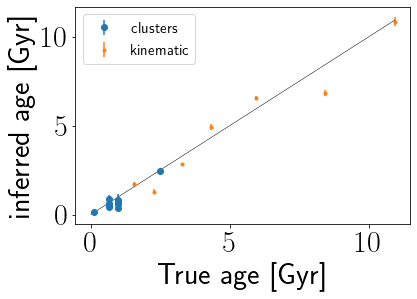

<class 'numpy.ndarray'> 20
2 of 1 kinerr =  1.5


/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1115.6550169448622 -> -1111.6190243491285
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1111.6190243491285 -> -1110.9494852741245
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1110.9494852741245 -> -1108.959524141708
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1108.959524141708 -> -1107.1076578139803
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1107.1076578139803 -> 196.80847496167365
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 196.80847496167365 -> 209.9475316508477
100%|██████████| 10/10 [00:00<00:00, 12.76it/s]
optimizing logp for variables: [slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1115.6342662602024 -> -1111.590027103203
optimizing logp for variables: [log_smooth]


message: Optimization terminated successfully.
logp: -1111.590027103203 -> -1110.9453613298922
optimizing logp for variables: [log_period_break_b, log_period_break_m, teff_break]


message: Optimization terminated successfully.
logp: -1110.9453613298922 -> -1108.9568305600828
optimizing logp for variables: [log_smooth, slope_high, slope_low]


message: Optimization terminated successfully.
logp: -1108.9568305600828 -> -1107.1319223566766
optimizing logp for variables: [log_ell1, log_amp, log_s2]


message: Optimization terminated successfully.
logp: -1107.1319223566766 -> 193.2542467351873
optimizing logp for variables: [teff_break, log_period_break_m, log_period_break_b, log_smooth, slope_low, slope_high, log_s2, log_amp, log_ell1]


message: Optimization terminated successfully.
logp: 193.2542467351873 -> 206.2604289521661
100%|██████████| 10/10 [00:00<00:00, 13.09it/s]


<class 'numpy.ndarray'> 20
0.5527341954280317 0.30089479549437637


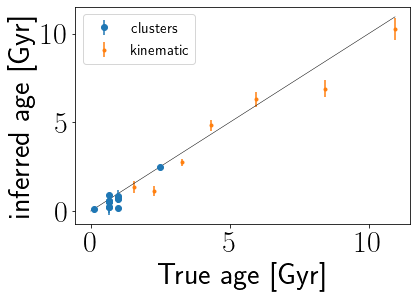

<class 'numpy.ndarray'> 20


In [102]:
filename = "../data/CV_gp_model.pkl"

rms, mad = [np.zeros(len(abs_kinerrs)) for i in range(2)]
results, all_true_ages, all_pred_ages, all_sigmas = [], [], [], []
for j, kinerr in enumerate(abs_kinerrs):
    print(j+1, "of", len(kinerrs), "kinerr = ", kinerr)
    
    # Create data arrays using variables
    x, age, prot, prot_err, ID, akin, cluster_x, cluster_prot, cluster_age = assemble_data(young_limit, old_limit, hot_limit, dp, dc, cluster_old_err, kinerr, sun_err)
    
    # Cross validate.
    true_ages_cv, pred_ages_cv, sigmas_cv, ids_cv, results_cv = cross_validate(x, age, prot, prot_err, ID, filename, nbatches=2)
    
    # Plot inferred vs. true age
    plt.errorbar(true_ages_cv[ids_cv==0], pred_ages_cv[ids_cv==0], yerr=sigmas_cv[ids_cv==0], fmt="o", label="clusters")
    plt.errorbar(true_ages_cv[ids_cv==1], pred_ages_cv[ids_cv==1], yerr=sigmas_cv[ids_cv==1], fmt=".", label="kinematic")
    xs = np.linspace(0, max([max(apa), max(ata)]), 100)
    plt.plot(xs, xs, "k-", lw=.5)
    plt.xlabel("True age [Gyr]")
    plt.ylabel("inferred age [Gyr]")
    plt.legend()
    print(RMS(ata, apa), MAD(ata, apa))
    plt.show()
    
    rms[j] = RMS(true_ages_cv, pred_ages_cv)
    mad[j] = MAD(true_ages_cv, pred_ages_cv)
    results.append(results_cv)
    all_true_ages.append(true_ages_cv)
    all_pred_ages.append(pred_ages_cv)
    all_sigmas.append(sigmas_cv)

In [113]:
len(all_true_ages[0]), all_pred_ages[0]

(20,
 array([ 0.43241579,  1.29207732,  0.71328974,  0.86950781,  0.58513822,
         1.70694793,  0.15815672,  6.55465861,  0.53029233,  2.83603934,
         0.82379072,  0.37128023,  4.90236599,  0.56580041,  2.47336882,
         0.60223869, 10.85121283,  0.5431759 ,  6.83587471,  0.56309053]))

No handles with labels found to put in legend.


2


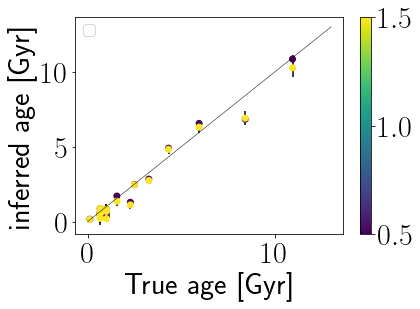

In [118]:
# Plot inferred vs. true age
nvars = len(all_true_ages)
var = abs_kinerrs
for i in range(nvars):
    plt.errorbar(all_true_ages[i], all_pred_ages[i], yerr=all_sigmas[i], fmt="k.", zorder=0)
    plt.scatter(all_true_ages[i], all_pred_ages[i], c=np.ones(len(all_true_ages[i]))*var[i],
                vmin=min(var), vmax=max(var), zorder=1)
xs = np.linspace(0,13, 100)
plt.plot(xs, xs, "k-", lw=.5)
plt.colorbar()
plt.xlabel("True age [Gyr]")
plt.ylabel("inferred age [Gyr]")
plt.legend()

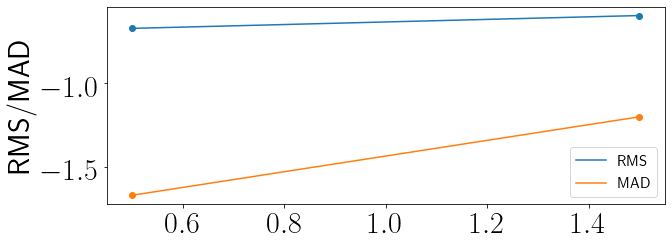

In [104]:
fig = plt.figure(figsize=(10, 8))
ax0 = fig.add_subplot(211)
ax0.plot(abs_kinerrs, np.log(rms), "C0o")
ax0.plot(abs_kinerrs, np.log(rms), "C0-", label="RMS")
ax0.plot(abs_kinerrs, np.log(mad), "C1o")
ax0.plot(abs_kinerrs, np.log(mad), "C1-", label="MAD")
ax0.set_ylabel("RMS/MAD")
ax0.legend()